"""
Date: 2022-10-01
Author: Martin Loza
Name: First test on mcool files
"""

On this notebook I will test the mcool files and the cooltools package to import them and explore them


In [71]:
import cooler
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns

#Global variables
date = 231208
seed = 777
in_dir = "/Volumes/MARTIN_LOZA/Projects/HK_Interactions/Data/HiC/SRA/mcool/"
our_dir = "~/Documents/Projects/HK_Interactions/Analysis/2023_12_12/Results/"

Let's create loop by cell type. Within the loop I will get the matrix with the balanced count. Then, I will filter inter-chromosomal interactions.

In [72]:
# Define the list of mcool files for the 5 cell types
mcool_files = [
    in_dir + "GM12878-HindIII-allReps-filtered.mcool",
    in_dir + "K562-HindIII-allReps-filtered.mcool",
    in_dir + "KBM7-HindIII-allReps-filtered.mcool",
    in_dir + "IMR90-HindIII-allReps-filtered.mcool",
    in_dir + "HUVEC-HindIII-allReps-filtered.mcool"
]

# Select a resolution
res = 10000

# Create an empty list to store the weights data frames for each cell type
weights_dfs = []

# Iterate over each mcool file
for mcool_file in mcool_files:
    
    # Get the cooler object for the selected resolution
    current_cooler = cooler.Cooler(mcool_file + "::resolutions/" + str(res))

    # Get the balance weights 
    matrix = current_cooler.matrix(balance=True, as_pixels=True, join=True)[:]
    # Convert the matrix to a data frame
    matrix = pd.DataFrame(matrix)
    
    # Filter out inter-chromosomal interactions
    matrix = matrix[matrix.chrom1 == matrix.chrom2]
    
    # print size of matrix for tests
    # print(len(matrix))
    
    # Add cell type column
    matrix['cell_type'] = mcool_file.split('/')[-1].split('-')[0]
    
    # Print the first 5 rows of the data frame for tests
    # print(matrix.head())
    
    # Store the weights data frame in the list
    weights_dfs.append(matrix)
    
# print the length of the list of weights data frames. For Test
# len(weights_dfs)

Let's merge the data frames into one. We will then use this data frame to create boxplot by chromosome and by cell type

In [73]:
# Merge the weights data frames in the list
weights_all = pd.concat(weights_dfs)
# Table with the number of interactions per cell type
weights_all.groupby('cell_type').size()

cell_type
GM12878    47902481
HUVEC      42758408
IMR90      57428201
K562       79207430
KBM7       35262593
dtype: int64

<Figure size 1000x1000 with 0 Axes>

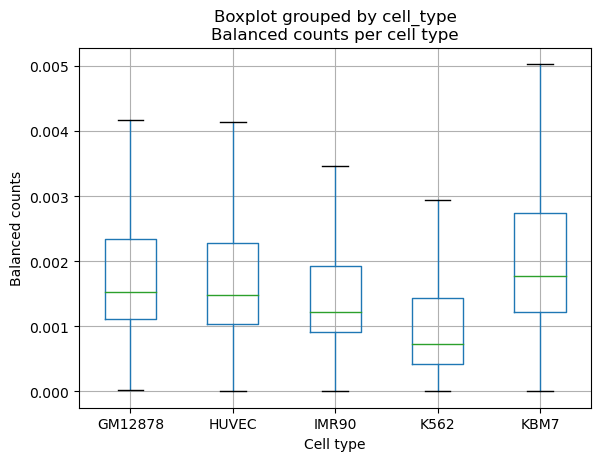

In [74]:
plt.figure(figsize=(10, 10))
weights_all.boxplot(column='balanced', by='cell_type', showfliers=False,    )
plt.title('Balanced counts per cell type')
plt.ylabel('Balanced counts')
plt.xlabel('Cell type')
plt.show()


In [75]:
#test data frame
test_df = weights_all[weights_all.chrom1 == 'chr14']
test_df[:5]

,chrom1,start1,end1,chrom2,start2,end2,count,balanced,cell_type
61071594,chr14,16020000,16030000,chr14,21640000,21650000,2,NaN,GM12878
61071595,chr14,16020000,16030000,chr14,27250000,27260000,2,NaN,GM12878
61071596,chr14,16020000,16030000,chr14,29180000,29190000,2,NaN,GM12878
61071597,chr14,16020000,16030000,chr14,47610000,47620000,2,NaN,GM12878
61071598,chr14,16020000,16030000,chr14,55160000,55170000,2,NaN,GM12878


In [76]:
# I want to check if there is any duplicated index
weights_all.index.duplicated().sum()

140453926

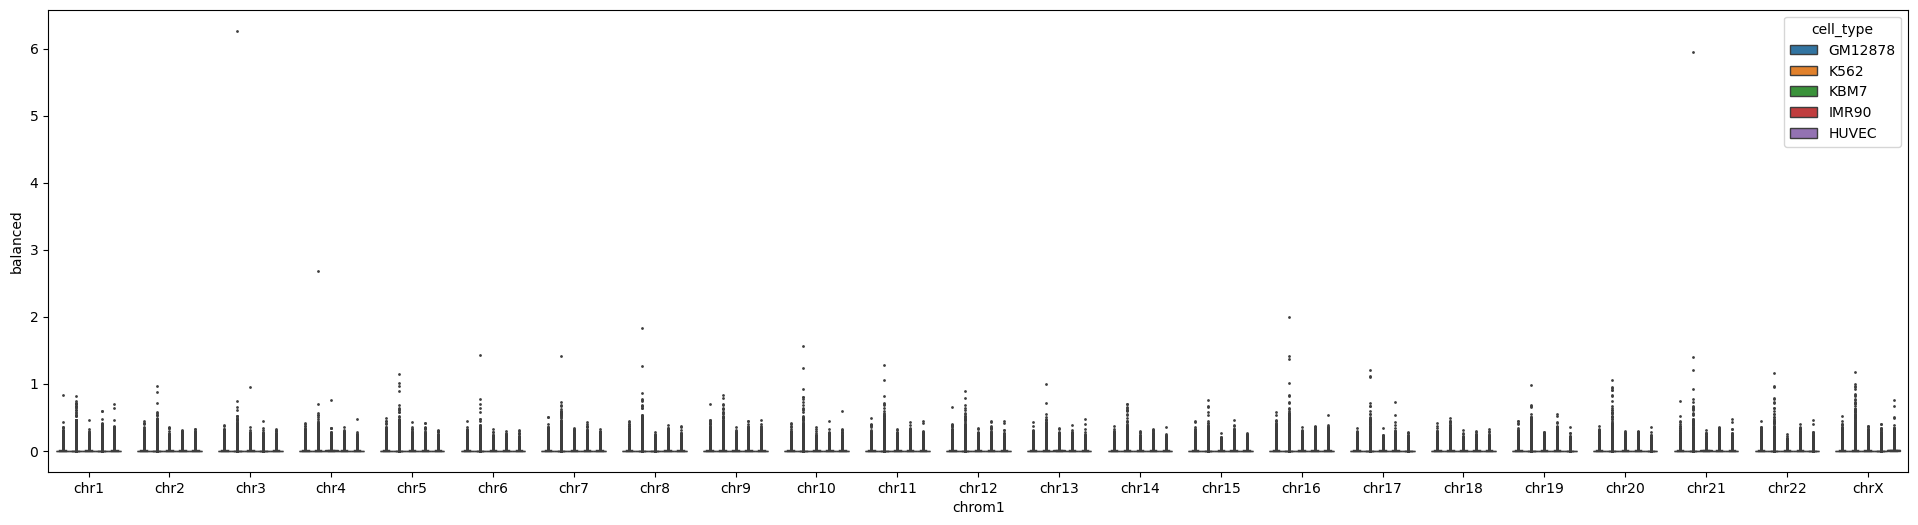

In [77]:
test_df = weights_all.reset_index(drop=True)
# create a group boxplot
plt.figure(figsize=(24, 6))
sns.boxplot(data=test_df, x="chrom1", y="balanced", hue="cell_type", fliersize=1)
plt.show()


/Users/martin/miniconda3/envs/HK_PPI/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


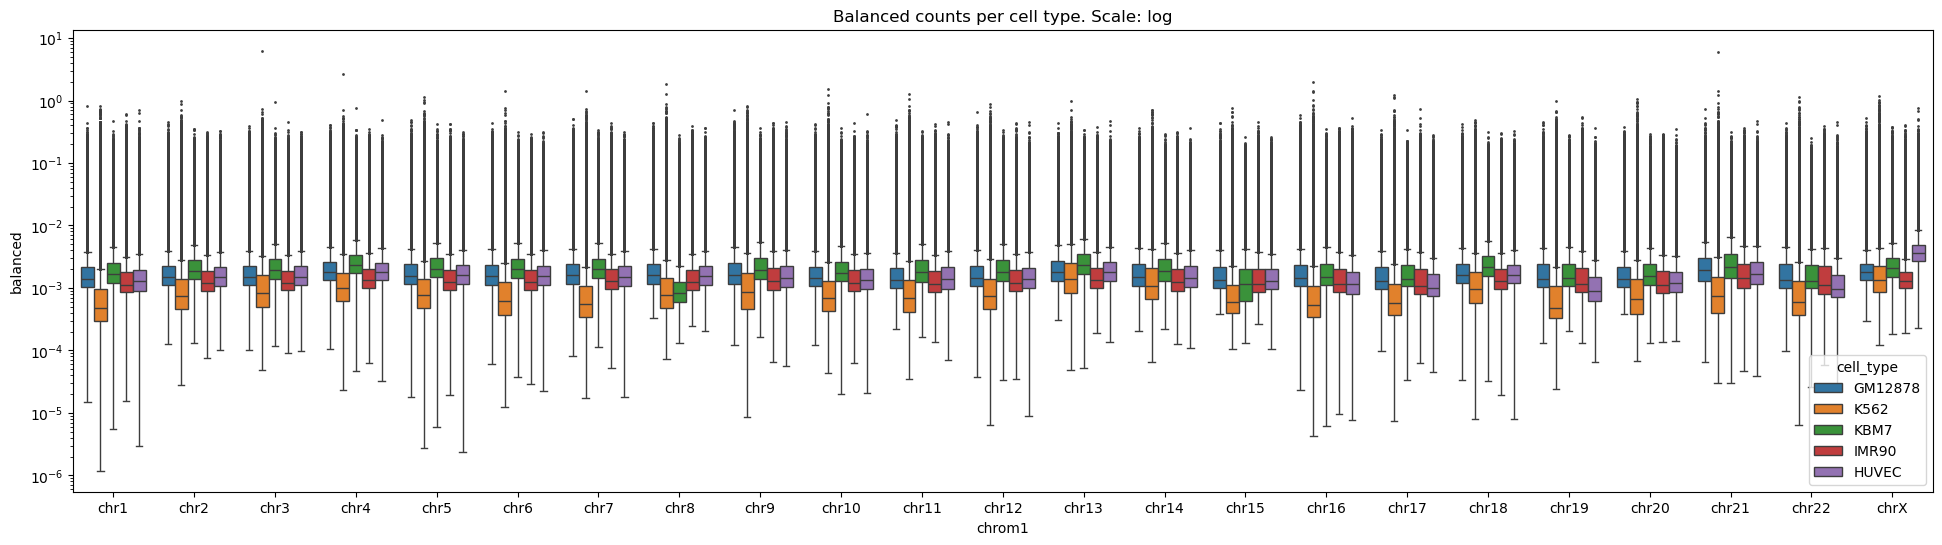

In [78]:
test_df = weights_all.reset_index(drop=True)
# create a group boxplot
plt.figure(figsize=(24, 6))
sns.boxplot(data=test_df, x="chrom1", y="balanced", hue="cell_type", fliersize=1)
plt.yscale('log')  # Scale the y-axis by log10
plt.title('Balanced counts per cell type. Scale: log')
plt.show()

This is difficult to see. Let's check only one chromosome.

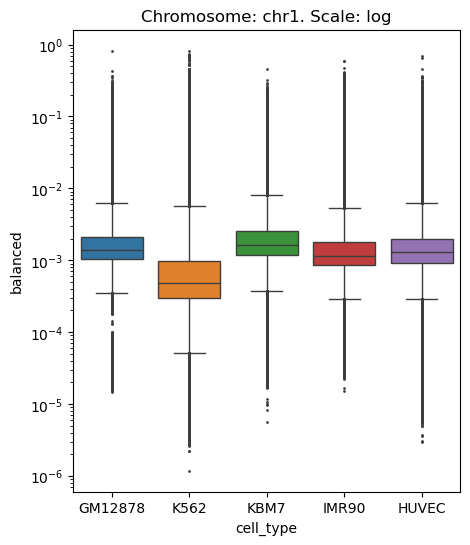

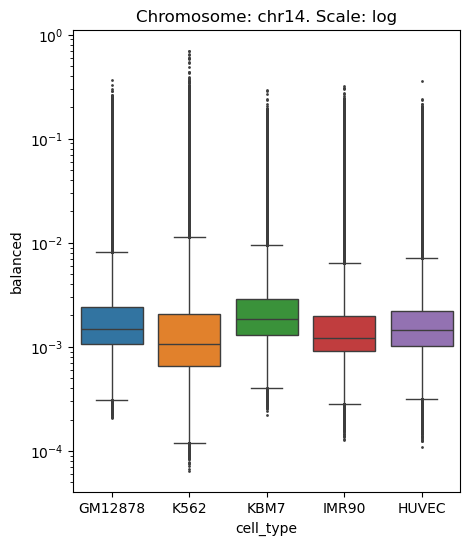

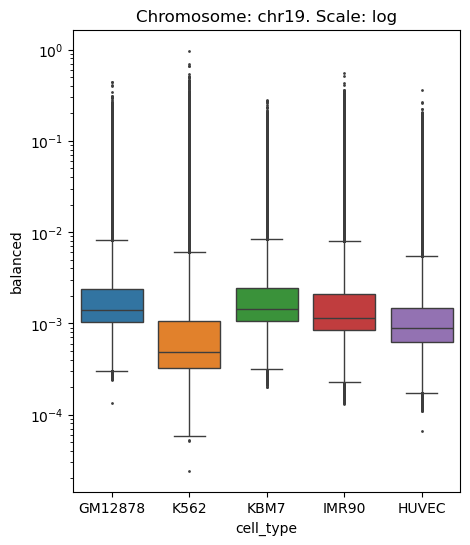

In [79]:
# Reset the index of the data frame
test_df = weights_all.reset_index(drop=True)

#Define the list of chromosomes to plot
chromosomes=["chr1", "chr14", "chr19"]

for chromosome in chromosomes:
    # Sampling only interactions from chr14
    c_df = test_df[test_df.chrom1 == chromosome]
    # Remove the other chromosomes information
    c_df = c_df.drop(['chrom1', 'chrom2'], axis=1)

    # create a group boxplot
    plt.figure(figsize=(5, 6))
    sns.boxplot(data=c_df, x="cell_type", y="balanced", hue="cell_type", fliersize=1, log_scale=True)
    plt.title("Chromosome: " + chromosome + ". Scale: log")
    plt.show()

    



In [ ]:
# # Plot the weights distribution in a boxplot using the "cell_type" column as the color
# plt.figure(figsize=(10, 5))
# plt.title('Weights distribution')
# plt.ylabel('Weights')
# plt.xlabel('Cell type')

# plt.show()
